In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys

import csv
import collections
from parse_rest.connection import register
from parse_rest.datatypes import Object
import key
from manager import KeyStrokeManager
from sklearn.linear_model import LogisticRegression

register(key.APP_ID, key.REST_API_KEY)

class DataChunk(Object):
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# allData = DataChunk.Query.all().filter(appVersion__exists=True, interTapDistances__exists=True).limit(1000)
allData = DataChunk.Query.all().filter(appVersion__exists=True, interTapDistances__exists=True).limit(1000)
acsaluData = allData.filter(userId='acsalu')
co273Data = allData.filter(userId='co273', appVersion="0.3.4")
jeanData = allData.filter(userId='jean')

In [4]:
def label_stats(data):
    labels = map(lambda d: d.emotion, data)
    counter = collections.Counter(labels)
    return counter

In [5]:
print('allData: ', label_stats(allData), '  Total: ', len(allData))
print('acsaluData: ', label_stats(acsaluData), '  Total: ', len(acsaluData))
print('co273Data: ', label_stats(co273Data), '  Total: ', len(co273Data))
print('jeanData: ', label_stats(jeanData), '  Total: ', len(jeanData))

allData:  Counter({'Happy': 219, 'Calm': 205, 'Sad': 192, 'Angry': 5})   Total:  621
acsaluData:  Counter({'Happy': 18, 'Sad': 16, 'Calm': 15})   Total:  49
co273Data:  Counter({'Happy': 67, 'Sad': 66, 'Calm': 60})   Total:  193
jeanData:  Counter({'Calm': 46, 'Happy': 35, 'Sad': 24})   Total:  105


In [12]:
allData2 = list(acsaluData) + list(co273Data) + list(jeanData)
whoseData = 'acsalu' # all | acsalu | co273 | jean
keyStrokeManager = KeyStrokeManager()
keyStrokeManager.initializeTrainData(acsaluData)

In [13]:
print('allData2: ', label_stats(allData2), '  Total: ', len(allData2))

allData2:  Counter({'Calm': 121, 'Happy': 120, 'Sad': 106})   Total:  347


# Logistic Regression

In [14]:
keyStrokeManager.logisticRegression() 
print(keyStrokeManager.crossValidScore())

0.714460784314


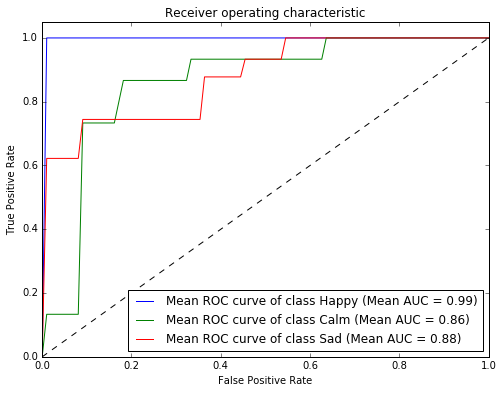

In [15]:
keyStrokeManager.plotROC()

# SVM

In [17]:
keyStrokeManager.svm()
print(keyStrokeManager.crossValidScore())

0.697782732565


# Naive Bayes

In [18]:
keyStrokeManager.naiveBayes()
print(keyStrokeManager.crossValidScore())

0.564994425864


# Random Forest

In [19]:
keyStrokeManager.randomForest()
print(keyStrokeManager.crossValidScore())

0.651653660349


# Export

In [16]:
m_path = 'pkl/'
keyStrokeManager.saveParams(m_path + whoseData + '_params.csv')
keyStrokeManager.saveModel(m_path + whoseData + '.pkl')